## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



## < *Please find our answers underneath* > ##

For this part I would like you to experiment with Data from Amsterdam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.

## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.

## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.

## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.

## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Adres         506 non-null    object  
 1   Soort         506 non-null    object  
 2   Datum         506 non-null    object  
 3   Omschrijving  506 non-null    object  
 4   Foto          506 non-null    object  
 5   geometry      506 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 23.8+ KB


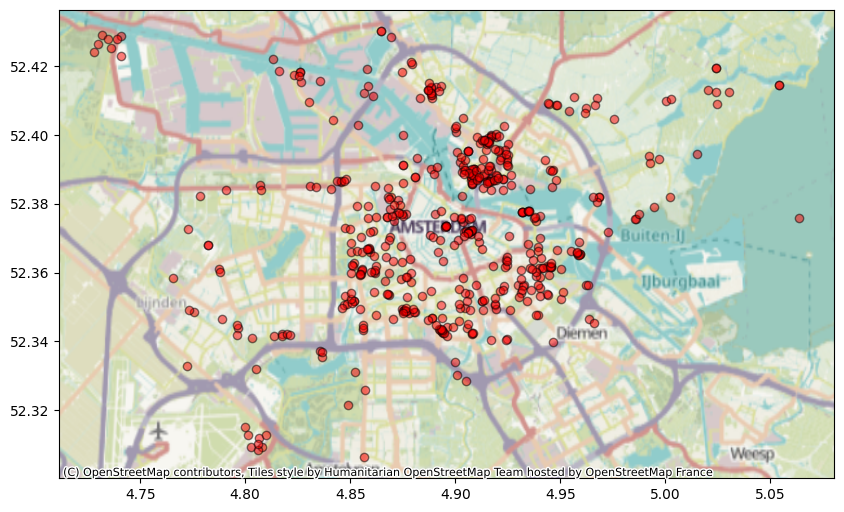

In [49]:
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Exercise 0

# First we decided to use this shapefile. Made with point data. This shapefile shows data from Amsterdam during world war 2. We have downloaded the geojson LngLat data
# and copied it into a shapefile using VSC. It is really interesting to see the point data as you can recognize Amsterdam and specific places that were not bombed.
# Examples of these places not boing bombed are the Grachtengordel. 

imd_shp1 = 'C:/Users/joche/Documents/MADE/Period 1/Data 1/lab-03/data/Amsterdam' # import the shapefile.
imd1 = gpd.read_file(imd_shp1) # the next lines read and show the data.
imd1.info()

fig, ax = plt.subplots(figsize=(10, 10))
imd1.plot(ax=ax, color='red', alpha=0.5, edgecolor='black')

# Then we added a basemap
ctx.add_basemap(ax, crs=imd1.crs.to_string())

# And finally, show it.
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CBS_Buurtcode   518 non-null    object  
 1   Buurtcode       518 non-null    object  
 2   Buurt           518 non-null    object  
 3   Wijkcode        518 non-null    object  
 4   Wijk            518 non-null    object  
 5   Gebiedcode      518 non-null    object  
 6   Gebied          518 non-null    object  
 7   Stadsdeelcode   518 non-null    object  
 8   Stadsdeel       518 non-null    object  
 9   Oppervlakte_m2  518 non-null    int64   
 10  geometry        518 non-null    geometry
dtypes: geometry(1), int64(1), object(9)
memory usage: 44.6+ KB


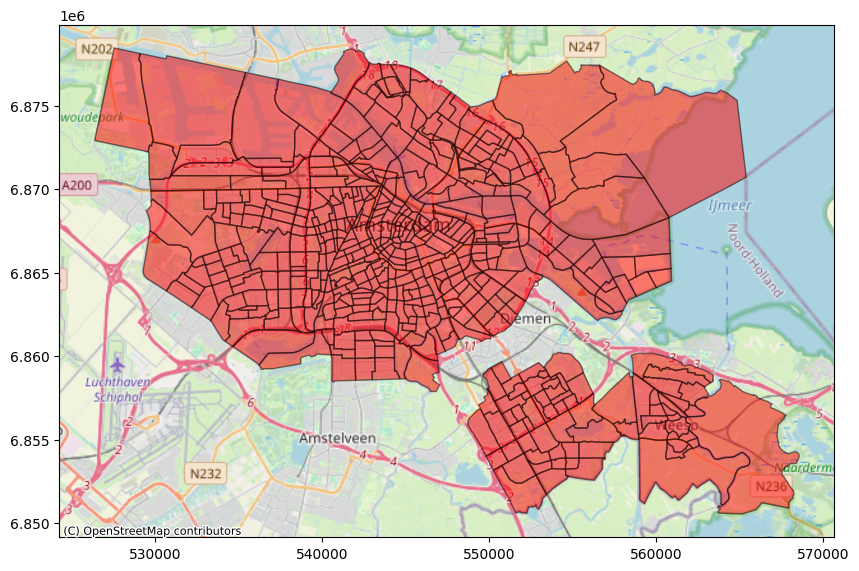

In [50]:
# Exercise 0.1
# However, for this exercise, we needed a shapefile with polygons. We have downloaded the geojson LngLat data
# and copied it into a shapefile using VSC. So, we decided to use districts (wijken) in Amsterdam.

 # import the shapefile.
imd_shp = 'C:/Users/joche/Documents/MADE/Period 1/Data 1/lab-03/data/Amsterdam-neighbourhoods'
imd = gpd.read_file(imd_shp) 

# the next lines read and show the data.
imd.info()

# Set the coordination system and figsize including decoration such as colors.
fig, ax = plt.subplots(figsize=(10, 10))
imd = imd.to_crs(epsg=3857)
imd.plot(ax=ax, color='red', alpha=0.5, edgecolor='black')

# Check if CRS is set, if not, set it. We use WGS84 or EPSG: 4326
if imd.crs is None:
    imd.set_crs(epsg=4326, inplace=True) 

# Reproject to web Mercator (EPSG:3857)
imd = imd.to_crs(epsg=3857)

# Then we added the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# show it:
plt.show()



In [79]:
#importing everything else that is important
import numpy as np
from libpysal import weights
from libpysal.weights import Queen
import libpysal
import matplotlib.pyplot as plt
import contextily as ctx
from pysal.explore import esda
import pandas as pd
import geopandas as gpd
from esda.moran import Moran
from libpysal.weights import DistanceBand 
from libpysal.weights import lag_spatial

In [81]:
# Exercise 1

# We wanted to see the first table lines and decided we used the "CBS_Buurtcode".
imd.head() 

# First, we define a function named create_conguite_weights. It relies on imd_shp. Then, we read the shapefile into a GDF called imd. After that, we use weights.Queen.from_dataframe() to generate a weight matrix. returning and printing shows that it works.
def create_conguite_weights():
    imd = gpd.read_file(imd_shp) 
    w_queen = weights.Queen.from_dataframe(imd, ids="CBS_Buurtcode")
    return w_queen
print(create_conguite_weights())

# Now, we want to test what it shows, we used the row with number 1 to test.
w_queen['BU0363AC03'] 

c:\Users\joche\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


{'BU0363AD04': 1.0,
 'BU0363AB10': 1.0,
 'BU0363AB07': 1.0,
 'BU0363AC04': 1.0,
 'BU0363AC02': 1.0,
 'BU0363AD06': 1.0}

In [53]:
# Exercise 2

# Extract the variable of interest
y = imd['Oppervlakte_m2'].values

# Recreate a spatial weights object from the imd shapefile using Queen contiguity, based on last exercise. Added index=False to prevent warning.
W = Queen.from_dataframe(imd, use_index=False)

# Function to calculate Moran's I. 
def calculate_morans_i(W, y):
    y = np.array(y)
    moran = Moran(y, W)
    return moran.I, moran.p_sim

# Calculate Moran's I and p-value
morans_i, p_value = calculate_morans_i(W, y)

# Print the results
print(f"Moran's I: {morans_i}")
print(f"p-value: {p_value}")

# comments and notes:

# W: Spatial weights matrix (defines neighborhood relationships).
# y: Values of the variable of interest.

# Steps:
# Convert y to a NumPy array.
# Create a Moran object with y and W to compute Moran's I.
# Return:
# moran.I: Value of Moran's I (indicates clustering of similar or dissimilar values).
# moran.p_sim: p-value for statistical significance.

Moran's I: 0.3394780199685298
p-value: 0.001


In [83]:
# Exercise 3

def standardize_weights(W):
   
    # Create a dense matrix from the spatial weights object.
    weight_matrix = W.full()[0]  
    
    # Calculate row sums.
    row_sums = weight_matrix.sum(axis=1)
    
    # This will handle zero sums. Any zero will be replaced with 1.
    row_sums[row_sums == 0] = 1  # Prevent division by zero
    
    # Standardize weights: divide each row by its sum
    standardized_matrix = weight_matrix / row_sums[:, np.newaxis]  # Broadcasting (The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations -Numpy.org) to standardize
    
    return standardized_matrix

# Standardize the weights
standardized_W = standardize_weights(w_queen)

# Output of the standardized weights
print("Standardized Weight Matrix:")
print(standardized_W)


Standardized Weight Matrix:
[[0.         0.14285714 0.         ... 0.14285714 0.         0.14285714]
 [0.16666667 0.         0.16666667 ... 0.16666667 0.         0.        ]
 [0.         0.16666667 0.         ... 0.16666667 0.16666667 0.        ]
 ...
 [0.125      0.125      0.125      ... 0.         0.125      0.        ]
 [0.         0.         0.2        ... 0.2        0.         0.        ]
 [0.14285714 0.         0.         ... 0.         0.         0.        ]]


In [87]:
# Exercise 4

def create_distance_based_weights(imd, threshold=500, id_column='CBS_Buurtcode'):
       
    # Set to projected coordinate system (EPSG:28992).
    imd = imd.to_crs(epsg=28992)
    
    # As we have shapes, we need a centerpoint. Therefore the next step is taken.
    imd['center'] = imd.geometry.centroid 
    
    # Create a copy of the original GeoDataFrame to store the centroid points set.
    center_imd = imd.copy()
    
    # Set the geometry of the new GeoDataFrame to contain only the centroid coordinates as calculated before.
    center_imd.set_geometry('center', inplace=True)
    
    # Create the spatial weight matrix using the distance-based approach.
    w_distance = DistanceBand.from_dataframe(center_imd, threshold=threshold, ids=id_column)
    
    return w_distance

# Example how to use. Distance from centerpoint is set as 500 meters.
w_distance = create_distance_based_weights(imd, threshold=500, id_column='CBS_Buurtcode')

# Example to show the weights for neighbourhood BU0363AD06.
print(w_distance['BU0363AD06'])

{'BU0363AC03': 1.0, 'BU0363AC04': 1.0, 'BU0363AD04': 1.0, 'BU0363AD05': 1.0, 'BU0363AD07': 1.0, 'BU0363AD08': 1.0, 'BU0363AE04': 1.0, 'BU0363AE05': 1.0}


c:\Users\joche\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 145 disconnected components.
 There are 113 islands with ids: BU0363MK02, BU0363MK06, BU0363MK03, BU0363MA01, BU0363MA02, BU0363MG04, BU0363MK04, BU0363MH01, BU0363MH02, BU0363MH03, BU0363MH05, BU0363MH06, BU0363MK05, BU0363MJ01, BU0363MJ02, BU0363MJ03, BU0363MJ04, BU0363MJ05, BU0363MK01, BU0363MN04, BU0363MN05, BU0363MP02, BU0363MP03, BU0363MQ02, BU0363NA01, BU0363NA02, BU0363NB01, BU0363NB02, BU0363NB03, BU0363NB04, BU0363NB07, BU0363ND01, BU0363ND02, BU0363NG01, BU0363NJ01, BU0363NL04, BU0363NP01, BU0363NP03, BU0363NQ01, BU0363NQ03, BU0363NQ04, BU0363NQ05, BU0363NQ06, BU0363NQ07, BU0363NQ08, BU0363NQ09, BU0363NQ10, BU0363SA01, BU0363SA02, BU0363SB01, BU0363SB02, BU0363SB03, BU0363SB04, BU0363SB06, BU0363SE01, BU0363SE04, BU0363BA01, BU0363BA02, BU0363BA03, BU0363BA04, BU0363BA05, BU0363BB01, BU0363BB02, BU0363FA06,

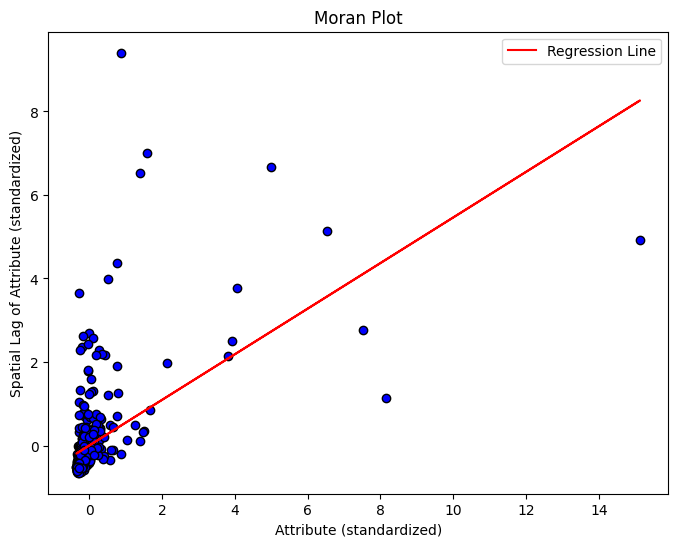

In [93]:
# Exercise 5

# y = imd['Oppervlakte_m2'].values and W = Queen.from_dataframe(imd, use_index=False) are used from previous exercise.

# Function to plot Moran's plot
def plot_moran(W, y, output_image_path):
    # Standardizing spatially lagged values of y
    y_lag = lag_spatial(W, y) # Computes average values of neighboring units.
    y_standardized = (y - np.mean(y)) / np.std(y) #  Standardizes y (mean = 0, std dev = 1).
    y_lag_standardized = (y_lag - np.mean(y_lag)) / np.std(y_lag) # Standardizes spatial lag values.

    # Creating the Moran scatterplot and plotting regression line
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(y_standardized, y_lag_standardized, edgecolor='k', facecolor='Blue')
    b, a = np.polyfit(y_standardized, y_lag_standardized, 1) # Creates linear regression
    ax.plot(y_standardized, a + b * y_standardized, color='red', label='Regression Line') # Creates and colors the linear regression line

    # Adding title and labels
    ax.set_title("Moran Plot")
    ax.set_xlabel("Attribute (standardized)")
    ax.set_ylabel("Spatial Lag of Attribute (standardized)")
    ax.legend() # needed for the regressionline label.

    # Saving the Moran plot as an image file (png)
    plt.savefig(output_image_path, format='png', dpi=300)
    
    # Displaying the plot
    plt.show()

# Save the image.
output_image_path = "C:/Users/joche/Documents/MADE/Period 1/Data 1/lab-03/data/Moran.png"

# Generate the plot.
plot_moran(W, y, output_image_path)